![Firedrake](banner.png)

The user interface to Firedrake is a Python module which exposes Firedrake's implementation of the FEniCS Language.

In [45]:
%matplotlib inline
from firedrake import *

In order to actually solve some PDEs, we need a domain. This can come from an external mesh generator, but for simple geometries, we can just use the built-in convenience functions. Let's start with a really easy one, a one-dimensional mesh with 20 intervals:


In [47]:
mesh = IntervalMesh(20, 2*pi)

We'll now actually need some way to store discretised quantities on this mesh. For this we first need a `FunctionSpace`. Let's start with the lowest order DG FunctionSpace.

In [32]:
cg1 = FunctionSpace(mesh, "CG", 1)
dg0 = FunctionSpace(mesh, "DG", 0)

The `FunctionSpace` objects describe the relationship between degrees of freedom and the mesh. Usually, we don't actually need to see how this works, but we can sneak a peek into the workings at this point. Let's look at the mapping from cells to degrees of freedom for DG0:

In [33]:
print dg0.cell_node_list

[[ 0]
 [ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]
 [11]
 [12]
 [13]
 [14]
 [15]
 [16]
 [17]
 [18]
 [19]]


As we can see, this trivially maps one degree of freedom to each cell. For CG1, the situation is slightly less trivial but nonetheless easy to understand:

In [34]:
print cg1.cell_node_list

[[ 1  0]
 [ 2  1]
 [ 3  2]
 [ 4  3]
 [ 5  4]
 [ 6  5]
 [ 7  6]
 [ 8  7]
 [ 9  8]
 [10  9]
 [11 10]
 [12 11]
 [13 12]
 [14 13]
 [15 14]
 [16 15]
 [17 16]
 [18 17]
 [19 18]
 [20 19]]


In order to actually store some discretised data, we need a `Function`. This is basically just a set of coefficients attached to a `FunctionSpace`.

In [35]:
phi = Function(cg1)
psi = Function(dg0)

At the moment, phi and psi are both the zero Function. A simple way to set their value is to interpolate a known function into them:

In [42]:
x = SpatialCoordinate(mesh)
phi.interpolate(sin(x[0]))
psi.interpolate(sin(x[0]))

In a while we'll look at more sophisticated visualisation, but right now we can just use the fact that we have very simple function spaces to plot the results.

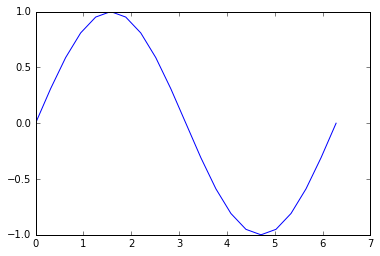

In [50]:
import pylab
X = mesh.coordinates
pylab.plot(X.dat.data_ro, phi.dat.data_ro)

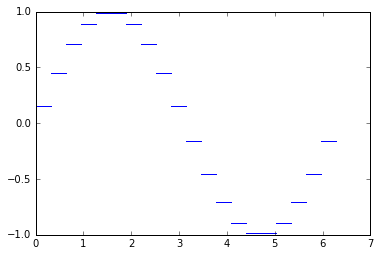

In [74]:
for i in dg0.cell_node_list:
    pylab.plot(X.dat.data_ro[X.function_space().cell_node_list[i[0]]], psi.dat.data_ro[[i[0], i[0]]], 'b')

In [71]:
X.function_space().cell_node_list[i[0]]
i

array([0], dtype=int32)